# Lesson 1 - Where Exactly Are We?

## Where are WE, right now?

Lets start by importing __SPICEYPY__ :

In [1]:
import spiceypy as spice

### When is now?
The first thing we need to do is define 'now'. We can do this easily by using the datetime module to get a 'now' date object, in string format :

In [2]:
import datetime

#Get the current time as a string
nowTime = datetime.datetime.now()
nowTimeString = str(nowTime)
print(nowTimeString)

2019-04-30 17:04:32.743276


With that done, we can try to use a built-in SPICE function called str2et to convert the timeString, to ET time. I've wrapped this in a try/except block, because as you'll see, SPICE is going to give us an error message : 

In [3]:
try :
    #Use SPICE's str2et function to convert our time string to ET time
    nowTimeET = spice.str2et(nowTimeString)
except Exception as e :
    #Uh oh...
    print(e)



Toolkit version: N0066

SPICE(NOLEAPSECONDS) --

The variable that points to the leapseconds (DELTET/DELTA_AT) could not be located in the kernel pool.  It is likely that the leapseconds kernel has not been loaded via the routine FURNSH.

str2et_c --> STR2ET --> TTRANS



Uh oh indeed. Being able to read (and more importantly understand) SPICE errors is one of the most useful skills you can develop, and throughout this video series you'll certainly have many chances to practice!

The error above very helpfully tells us that 'it is likely that the leapseconds kernel (often called an LSK) has not been loaded', which is correct - we've yet to load any kernels at all! So lets fix that, by loading in our first kernel :

In [4]:
import os

#Define our kernels path
kernelsPath = os.path.join(os.path.dirname(os.getcwd()), "kernels")

#Define the path to the leap second kernel
leapSecondsKernelPath = os.path.join(kernelsPath, "naif0012.tls")

#Load the kernel
spice.furnsh(leapSecondsKernelPath)

Now that the kernel is loaded, let's try to convert our timestring to ET :

In [5]:
#Use SPICE's str2et function to convert our time string to ET time
nowTimeET = spice.str2et(nowTimeString)
print(nowTimeET)

609915941.9287659


Fantastic, it worked! 

Now there's one __REALLY__ important line of code that you always want to ensure you include when loading kernels, and that's _unloading_ them once you've got the data you need.

To do this we use the _spice.kclear()_ command that you'll find at the very bottom of this notebook. I won't run it here as we're not quite done with __SPICE__ just yet...


### Where is Earth?

As discussed in the video, in order for __SPICE__ to tell us where things are in space, we need to give it specific _frames_ of reference, and in order to do that, we need to load another kernel :

In [6]:
#Define the path to the solar system ephemeris kernel
solarSystemEphermisKernelPath = os.path.join(kernelsPath, "de405.bsp")

#Load the kernel
spice.furnsh(solarSystemEphermisKernelPath)

Loading that single kernel gives us access to a pretty large amount of frames that can be used for the more generic ephemeris calculations. Let's use two new __SPICE__ commands to list the frames we have available :

In [7]:
#List all now available frame IDs and print their names
for x in spice.bltfrm(-1):
    print(x, spice.frmnam(x))

1 J2000
2 B1950
3 FK4
4 DE-118
5 DE-96
6 DE-102
7 DE-108
8 DE-111
9 DE-114
10 DE-122
11 DE-125
12 DE-130
13 GALACTIC
14 DE-200
15 DE-202
16 MARSIAU
17 ECLIPJ2000
18 ECLIPB1950
19 DE-140
20 DE-142
21 DE-143
10001 IAU_MERCURY_BARYCENTER
10002 IAU_VENUS_BARYCENTER
10003 IAU_EARTH_BARYCENTER
10004 IAU_MARS_BARYCENTER
10005 IAU_JUPITER_BARYCENTER
10006 IAU_SATURN_BARYCENTER
10007 IAU_URANUS_BARYCENTER
10008 IAU_NEPTUNE_BARYCENTER
10009 IAU_PLUTO_BARYCENTER
10010 IAU_SUN
10011 IAU_MERCURY
10012 IAU_VENUS
10013 IAU_EARTH
10014 IAU_MARS
10015 IAU_JUPITER
10016 IAU_SATURN
10017 IAU_URANUS
10018 IAU_NEPTUNE
10019 IAU_PLUTO
10020 IAU_MOON
10021 IAU_PHOBOS
10022 IAU_DEIMOS
10023 IAU_IO
10024 IAU_EUROPA
10025 IAU_GANYMEDE
10026 IAU_CALLISTO
10027 IAU_AMALTHEA
10028 IAU_HIMALIA
10029 IAU_ELARA
10030 IAU_PASIPHAE
10031 IAU_SINOPE
10032 IAU_LYSITHEA
10033 IAU_CARME
10034 IAU_ANANKE
10035 IAU_LEDA
10036 IAU_THEBE
10037 IAU_ADRASTEA
10038 IAU_METIS
10039 IAU_MIMAS
10040 IAU_ENCELADUS
10041 IAU_TETHYS
10

Now back to the problem at hand. 

Let's set our reference frame to _J2000_ (i.e. a frame based on the Earth's equator and equinox), our target frame to _EARTH_ and our observer frame to the _SUN_.

Using the _spkpos_ command gives us both the position of the target in the reference frame relative to the observer, AND the light-time between the observer and it's target :

In [8]:
#Set our 
referenceFrame = "J2000"
target = "EARTH"
observer = "SUN"

[earthPosition, ltime] = spice.spkpos(target, nowTimeET, referenceFrame,'NONE', observer)
print("Earth's position is {}".format(earthPosition))
print("Light-time between Earth and the Sun is {}s".format(ltime))

#earthPosition is km

Earth's position is [-1.15761464e+08 -8.85208592e+07 -3.83729455e+07]
Light-time between Earth and the Sun is 502.6661738539764s


Lets use MatPlotLib to plot this data on a 3D graph. (As this isn't a MatPlotLib tutorial, I'm not going to break-down the structure of the plot itself here, but I have commented it in-case you're curious!)

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#We'll define a few helper functions here so we can (spoiler alert) use them later on!
def makePlanetPositionPlot(title, size=8, axisLimit=1.5e+08, sunSize=400):

    #Make the figure
    fig = plt.figure(figsize=(size, size))

    #Make sub plot
    axis3d = fig.add_subplot(111, projection='3d')

    #Set axis limits
    axis3d.set_xlim([-axisLimit, axisLimit])
    axis3d.set_ylim([-axisLimit, axisLimit])
    axis3d.set_zlim([-axisLimit, axisLimit])

    #Set axis labels
    axis3d.set_xlabel('X (km)')
    axis3d.set_ylabel('Y (km)')
    axis3d.set_zlabel('Z (km)')

    #Create the sun
    axis3d.scatter([0.0], [0.0], [0.0], s=sunSize, c="orange")

    #Add a title
    plt.title(title, y=1.025)
    
    #Return the plt
    return axis3d, fig

def addPlanetToPlot(axis3D, planetPosition, size, color):
    return axis3D.scatter([planetPosition[0]], [planetPosition[1]], [planetPosition[2]], s=size, c=color)

#Make the plot
axis3D, fig = makePlanetPositionPlot('Earths position relative to the Sun')

#Add the earth
addPlanetToPlot(axis3D, earthPosition, 40, 'blue')

#Show the plot
plt.show()

<Figure size 800x800 with 1 Axes>

Pretty awesome stuff! Now let's look at how we could expand our time range.

## Where will we be, for the next year?

Luckily (by which I mean 'thanks to the incredible foresight of the NAIF team'), __SPICE__ makes it incredibly easy to get position data for _multiple_ times with only a small adjustment to the previous command.

Let's start by getting 52 ET times, one for each week of the coming year :

In [10]:
from dateutil.relativedelta import relativedelta

#Lets make an array of 52 times over the next year
times = [nowTime]
for i in range(1, 52):
    times.append(nowTime + relativedelta(weeks=i))

#Convert to et
etTimes = [spice.str2et(str(x)) for x in times]
print(etTimes)

[609915941.9287659, 610520741.9286689, 611125541.9285522, 611730341.9284176, 612335141.9282671, 612939941.9281029, 613544741.927927, 614149541.9277424, 614754341.9275512, 615359141.9273562, 615963941.9271601, 616568741.9269656, 617173541.9267755, 617778341.9265921, 618383141.9264183, 618987941.9262564, 619592741.9261086, 620197541.9259771, 620802341.925864, 621407141.9257706, 622011941.9256988, 622616741.9256493, 623221541.9256232, 623826341.925621, 624431141.9256428, 625035941.9256885, 625640741.9257575, 626245541.925849, 626850341.9259616, 627455141.9260939, 628059941.9262439, 628664741.9264095, 629269541.926588, 629874341.9267771, 630479141.9269737, 631083941.9271749, 631688741.9273776, 632293541.9275788, 632898341.9277754, 633503141.9279644, 634107941.928143, 634712741.9283085, 635317541.9284585, 635922341.9285907, 636527141.9287033, 637131941.9287947, 637736741.9288636, 638341541.9289093, 638946341.928931, 639551141.9289287, 640155941.9289026, 640760741.9288532]


Easy! With that done, we can now use the same _spkpos_ command as before, but instead of passing in a single ET time, we pass in the entire _etTimes_ array :

In [11]:
#Here we can use the same target/referenceFrame/observer variables set above
#Note : I'm using [0] to remove the light-time as we don't require it.
earthPositions = spice.spkpos(target, etTimes, referenceFrame,'NONE', observer)[0]
print(earthPositions)

[array([-1.15761464e+08, -8.85208592e+07, -3.83729455e+07]), array([-1.03723701e+08, -1.00629465e+08, -4.36222467e+07]), array([-9.02224814e+07, -1.11310653e+08, -4.82531894e+07]), array([-7.54653210e+07, -1.20430275e+08, -5.22062797e+07]), array([-5.96534429e+07, -1.27876405e+08, -5.54336507e+07]), array([-4.30019811e+07, -1.33542656e+08, -5.78903280e+07]), array([-2.57543325e+07, -1.37347378e+08, -5.95402972e+07]), array([-8.16015763e+06, -1.39253441e+08, -6.03662137e+07]), array([ 9.54849128e+06, -1.39245108e+08, -6.03621307e+07]), array([ 2.71346973e+07, -1.37314947e+08, -5.95258691e+07]), array([ 4.43449726e+07, -1.33483433e+08, -5.78654781e+07]), array([ 6.09345459e+07, -1.27815403e+08, -5.54079456e+07]), array([ 7.66866977e+07, -1.20392453e+08, -5.21896925e+07]), array([ 9.13884268e+07, -1.11303778e+08, -4.82502885e+07]), array([ 1.04821726e+08, -1.00665993e+08, -4.36392932e+07]), array([ 1.16791272e+08, -8.86357787e+07, -3.84236902e+07]), array([ 1.27138766e+08, -7.53787433e+07

Let's add all of these times to a new plot :

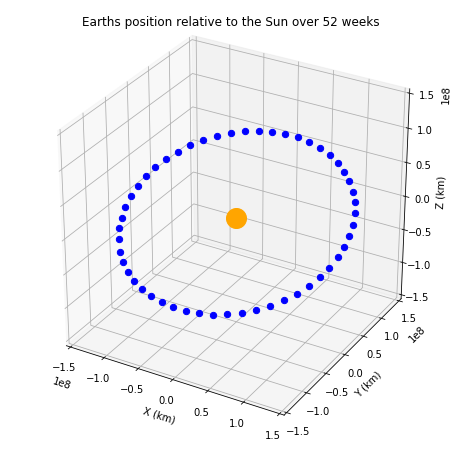

In [12]:
#Make the plot
axis3D, fig = makePlanetPositionPlot('Earths position relative to the Sun over 52 weeks')

#Add the data
for earthPosition in earthPositions:
    addPlanetToPlot(axis3D, earthPosition, 40, 'blue')

#Show the plot
plt.show()


## Ok. So where will _Venus_ be, for the next year?

As you might expect, getting this position of Venus over the course of the next year, is as simple as changing the _target_ frame that we're interested in :

In [13]:
#Change the target frame to VENUS
target = "VENUS"

#Now get the positions just like before
venusPositions = [spice.spkpos(target, etTime, referenceFrame,'NONE', observer)[0] for etTime in etTimes]
print(venusPositions[0])

[ 95511721.554008   -45166448.02172308 -26366112.53303658]


And now we can plot the results just by changing the positions array used :

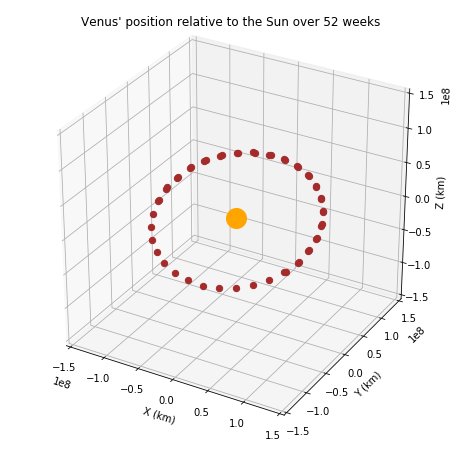

In [14]:
#Make the plot
axis3D, fig = makePlanetPositionPlot("Venus' position relative to the Sun over 52 weeks")

#Add the data
for venusPosition in venusPositions:
    addPlanetToPlot(axis3D, venusPosition, 40, 'brown')

#Show the plot
plt.show()


## ...and what about Mercury and Mars?

As this is getting pretty easy, let's try and plot everything at the same time! 

First we'll get all of the extra position data we require :

In [15]:
#Get Mercury Positions
target = "MERCURY"
mercuryPositions = [spice.spkpos(target, etTime, referenceFrame, 'NONE', observer)[0] for etTime in etTimes]

#Get Mars Positions
target = "MARS"
marsPositions = [spice.spkpos(target, etTime, referenceFrame, 'NONE', observer)[0] for etTime in etTimes]

Now it's just a case of plotting all of the data :

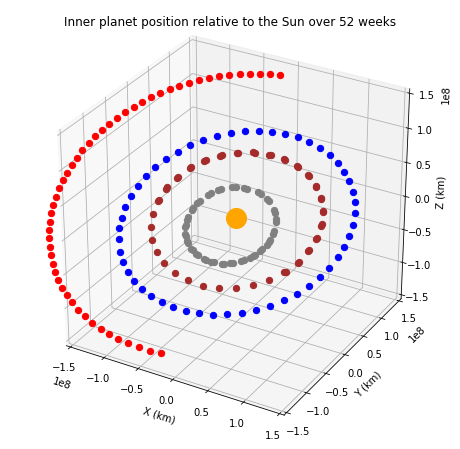

In [16]:
#Make the plot
axis3D, fig = makePlanetPositionPlot("Inner planet position relative to the Sun over 52 weeks")

#Add Mercury
for mercuryPosition in mercuryPositions:
    addPlanetToPlot(axis3D, mercuryPosition, 40, 'gray')
    
#Add Venus
for venusPosition in venusPositions:
    addPlanetToPlot(axis3D, venusPosition, 40, 'brown')
    
#Add the data
for earthPosition in earthPositions:
    addPlanetToPlot(axis3D, earthPosition, 40, 'blue')
    
#Add Mars
for marsPosition in marsPositions:
    addPlanetToPlot(axis3D, marsPosition, 40, 'red')

#Show the plot
plt.show()


Note : Obviously there are __MANY__ ways we could improve the above plot (and I'd love to see what you all come up with!) 

Whilst there's a __LOT__ more to explain and explore in the following videos, you should now feel reasonably comfortable with the main concepts behind the three fundamental building blocks of __SPICE__ : time, frames and kernels.

Speaking of kernels, let's finally unload them, and clean up our __SPICE__ environment :

In [17]:
# Clean up the kernels
spice.kclear()

And that's it for Lesson 1! SPICE can certianly be daunting, but together we've already managed to cover quite a bit, so _congratulations_ on getting this far!

If you're feeling ambitious, I've set a few challenges for you in the Readme, and as ever, you can always ask questions over on the __OpenPlanetary__ Slack.